In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

1. Lets create a function that generates a synthetic dataset for linear regression by creating random features with specified distributions. We will have 100 observations(rows) and 10 features(columns) with some random noise to make it like a real life scenario. We will set some seed, which means we can generate the same random numbers every time we run the function. We will generate random features using normal and uniform distribution to make it random but not too noisy. Also we will create an array of values representing the weight or importance of each feature in the linear equation and add a constat term(bias) to the linear equation. And then we will save the generated dataset into a csv file that we will later use.

In [223]:
def generate_linear_regression_data(seed=49, n=100, m=10, noise_std=0.5, file_name='linear_regression_data.csv'):
    """
    Generates a synthetic dataset for multiple linear regression with the given parameters and saves it to a CSV file.

    Parameters:
    -----------
    seed : int, optional
        Seed for random number generation to ensure reproducibility (default is 49).
    n : int, optional
        Number of observations (default is 100).
    m : int, optional
        Number of features (default is 10).
    noise_std : float, optional
        Standard deviation of the noise added to the dependent variable `y` (default is 0.5).
    file_name : str, optional
        Name of the CSV file to save the generated dataset (default is 'linear_regression_data.csv').

    Returns:
    --------
    None
    """
    # Set a seed for reproducibility
    np.random.seed(seed)

    # Generate random features with different ranges and distributions
    X = np.column_stack([
        np.random.uniform(0, 50, n),         # Feature 1: Uniform distribution [0, 50]
        np.random.normal(10, 5, n),          # Feature 2: Normal distribution mean=10, std=5
        np.random.normal(20, 10, n),         # Feature 3: Normal distribution mean=20, std=10
        np.random.uniform(0, 100, n),        # Feature 4: Uniform distribution [0, 100]
        np.random.uniform(-50, 50, n),       # Feature 5: Uniform distribution [-50, 50]
        np.random.normal(100, 20, n),        # Feature 6: Normal distribution mean=100, std=20
        np.random.uniform(0, 1, n),          # Feature 7: Uniform distribution [0, 1]
        np.random.normal(50, 15, n),         # Feature 8: Normal distribution mean=50, std=15
        np.random.uniform(-10, 10, n),       # Feature 9: Uniform distribution [-10, 10]
        np.random.normal(0, 5, n)            # Feature 10: Normal distribution mean=0, std=5
    ])

    # Define coefficients and calculate y
    coefficients = np.array([5, 2, 1, 3, -1, 4, 0.5, 7, 1, 6])  # Coefficients
    bias = 10  # Intercept term

    # Calculate y as a linear combination of features + reduced noise
    noise = np.random.normal(0, noise_std, n)
    y = X.dot(coefficients) + bias + noise

    # Combine X and y into a DataFrame
    columns = [f'x{i+1}' for i in range(m)]
    df = pd.DataFrame(X, columns=columns)
    df['y'] = y

    # Save to a CSV file
    df.to_csv(file_name, index=False)

# Example usage
generate_linear_regression_data()

2. The dependant variable is a linear combination of the features each multiplioed by its coefficient. The bias and noise are added to shit the result and add some randomness

### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

1. Lets read the generated dataset

In [224]:
data = pd.read_csv('linear_regression_data.csv')

In [225]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,15.048223,14.684972,36.750488,17.647882,-1.352161,105.003606,0.032418,36.675582,6.454816,-0.177988,888.434030
1,12.353092,12.976214,5.786552,62.503953,-18.537786,97.126505,0.728675,57.590926,2.687929,-0.954695,1097.794115
2,46.316757,2.564661,21.969222,16.107910,-9.539181,79.347032,0.384974,38.374836,2.353192,5.447479,948.216392
3,44.580172,2.555282,12.609197,3.294174,34.678986,114.049408,0.670229,61.486362,-8.803386,-2.271465,1091.099310
4,34.163838,6.667057,12.419748,7.190539,1.390041,98.397612,0.946322,34.952584,9.621198,3.755145,898.384264
...,...,...,...,...,...,...,...,...,...,...,...
95,24.507101,5.777868,10.485026,82.451139,-49.397967,91.530256,0.992329,58.431917,5.836962,2.449839,1248.364772
96,30.333632,9.755933,10.380063,89.426530,-37.727605,95.386657,0.464687,50.084078,9.005066,0.880429,1244.188832
97,0.556174,17.423124,26.218228,59.665379,32.063724,127.598291,0.255543,54.456345,8.565428,-3.030257,1102.670795
98,19.055393,9.506344,26.749117,35.451330,13.090141,117.316016,0.604384,60.580384,-1.494528,-6.006924,1099.823819


2. Let's look at the summary statistics

In [226]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,27.662134,9.343783,21.152105,50.354324,-2.395422,101.435863,0.515018,49.671265,-0.004639,-0.294134,1093.565423
std,14.364536,4.785074,10.901420,31.740924,30.235295,18.366215,0.295680,15.641905,6.226536,4.927380,190.834720
min,0.264848,-1.800488,-9.904430,0.046961,-49.397967,57.600209,0.003197,13.515023,-9.786720,-11.768953,650.106886
25%,15.492661,6.246821,14.350854,18.349670,-25.803329,87.956508,0.254806,38.727170,-6.275782,-3.319498,935.265471
50%,29.874864,9.414536,22.414765,49.371951,-5.245765,100.428902,0.530849,49.604450,0.474872,-0.800208,1098.808967
75%,40.145108,12.264674,29.324854,81.640298,27.539355,114.308294,0.741423,59.317962,5.867380,2.318953,1225.821286
max,49.505357,23.996049,49.210025,99.366850,46.693497,150.511291,0.992329,107.039048,9.892695,14.195242,1540.514971


3. Overall, the data appears to be well-spread, with varying ranges and distributions across different features. This kind of variation is beneficial for linear regression models because it helps in determining the relationships between different features and the target variable (y). For instance, x6 and x7 have relatively higher mean values and lower standard deviations, indicating that these variables might have a more stable and consistent relationship with y.
If you look closely at y, the dependent variable, you'll notice that its mean is high (around 1093.57), and its range is wide (from 650.11 to 1540.51). This indicates that the linear combination of features plus the bias and noise leads to a fairly broad range of outcomes.
4. Let's look at the correlation between different features and the correlations between feature and the linear combination y and plot a heatmap to see the correlation matrix to see what is the correlation between features

In [227]:
correlation = data.corr()

In [228]:
correlation

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
x1,1.000000,-0.183071,-0.224689,-0.128034,0.037954,-0.032891,0.028195,0.086744,-0.052082,0.048093,0.327457
x2,-0.183071,1.000000,-0.121106,0.150839,0.004209,0.104358,0.027239,0.078673,0.019969,-0.144729,0.112081
x3,-0.224689,-0.121106,1.000000,-0.046577,0.021235,-0.045621,-0.040039,-0.089840,-0.052464,0.114309,-0.113364
x4,-0.128034,0.150839,-0.046577,1.000000,-0.253957,0.098432,-0.013676,0.069824,0.126413,-0.078009,0.565716
x5,0.037954,0.004209,0.021235,-0.253957,1.000000,0.124524,0.206327,-0.081762,-0.068232,0.070357,-0.259436
x6,-0.032891,0.104358,-0.045621,0.098432,0.124524,1.000000,-0.008157,0.065699,0.184709,-0.109906,0.431302
x7,0.028195,0.027239,-0.040039,-0.013676,0.206327,-0.008157,1.000000,-0.012629,0.065558,0.081698,-0.024728
x8,0.086744,0.078673,-0.089840,0.069824,-0.081762,0.065699,-0.012629,1.000000,-0.124715,-0.069355,0.662532
x9,-0.052082,0.019969,-0.052464,0.126413,-0.068232,0.184709,0.065558,-0.124715,1.000000,-0.047856,0.077109
x10,0.048093,-0.144729,0.114309,-0.078009,0.070357,-0.109906,0.081698,-0.069355,-0.047856,1.000000,0.039298


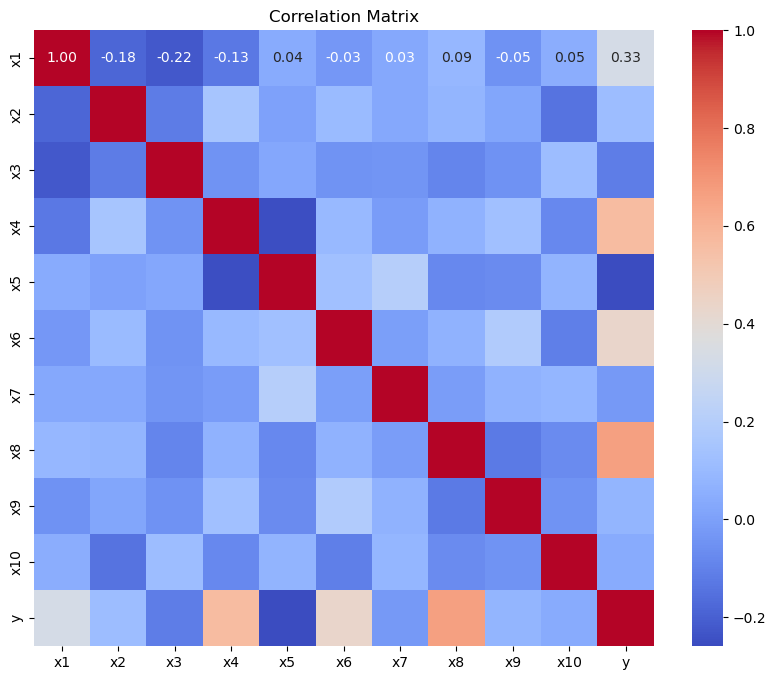

In [229]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

5. From this heatmap we can see that features like x8, x4, and x6 are likely to be the most important predictors in a linear regression model due to their relatively high positive correlations with y. x5 has a notable negative correlation with y, which may suggest an inverse relationship. Some features have low or no correlation with y, indicating they might not significantly contribute to the model or may require interaction with other features.

In [230]:
correlation_with_y = correlation['y'].sort_values(ascending=False)

In [231]:
correlation_with_y 

y      1.000000
x8     0.662532
x4     0.565716
x6     0.431302
x1     0.327457
x2     0.112081
x9     0.077109
x10    0.039298
x7    -0.024728
x3    -0.113364
x5    -0.259436
Name: y, dtype: float64

6. The results indicate that there is indeed a linear relationship between certain features and the output y. The features with higher coefficients in the data generation process (e.g., x8, x4, x6) exhibit stronger correlations with y, confirming that these features have a more significant linear relationship with the target variable.

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

1. Let's first understand the function. This equation represents a linear combination of the input features $x_i$ with their corresponding coefficients $a_i$ plus an intercept term $b$. The intercept shifts the prediciton up or down, while the coefficients determine the contribution of each feature to the prediction.
2. To make the repersentation more uniform we can include $b$ as a coefficient by adding 'bias' feature to the input data. This bias feature is a column of ones.
3. Now let's create e function that predicts the output using a linear regression.

In [232]:
def linear_regression_predict(X, coefficients):
    """
    Predict the output using a linear regression model with the intercept represented as a coefficient.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        np.ndarray: The predicted output vector of shape (n,).
    """
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Compute the predicted output as a linear combination of inputs and coefficients
    y_pred = np.dot(X_with_bias, coefficients)
    
    return y_pred

# Example Test Function
def test_linear_regression_predict():
    # Create some test data
    X_test = np.array([
        [1, 2],
        [3, 4],
        [5, 6]
    ])
    
    # Define coefficients (for example b=1, a1=2, a2=3)
    coefficients_test = np.array([1, 2, 3])
    
    # Expected output y = 1*1 + 2*x1 + 3*x2
    expected_y = np.array([9, 19, 29])
    
    # Predict using the function
    y_pred = linear_regression_predict(X_test, coefficients_test)
    
    # Check if the prediction matches the expected output
    assert np.allclose(y_pred, expected_y), "Test failed!"
    print("Test passed!")

# Run the test function
test_linear_regression_predict()


Test passed!


4. This function predicts the output (y) for a given set of input data (X) using a linear regression model. The linear regression model is represented by a set of coefficients, including an intercept (bias term). 
5. The first function computes predictions for a linear regression model. The second one correctly computes these predictions by comparing them against manually computed expected values and prints out the test result(if y_pred matches expected_y it passes).
6. As we can see the function seems to be working with the result being positive.
7. Let's now see how it works on our synthetic dataset and to see the first 5 predictions and actual Y's

In [235]:
# Load the dataset
df = pd.read_csv('linear_regression_data.csv')
X = df.iloc[:, :-1].values  # All columns except the last one (features)
y = df['y'].values  # Last column (target)

# Define the coefficients (including the intercept)
coefficients = np.array([10, 5, 2, 1, 3, -1, 4, 0.5, 7, 1, 6])

# Predict using the linear_regression_predict function
y_pred = linear_regression_predict(X, coefficients)

# Compare the prediction with the actual y values
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual y:", y[:5])

First 5 Predictions: [ 887.80395368 1098.52068715  947.78776956 1090.32925997  897.63838757]
First 5 Actual y: [ 888.43403034 1097.79411467  948.2163917  1091.09930987  898.3842639 ]


8. As we can see the predictions aren't 100% accurate but they are pretty close to the expected output.The predicted values are very close to the actual values. The differences between each corresponding prediction and actual value are quite small, which indicates that the model is accurately capturing the relationship between the input features and the output.

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

1. Lets first understand the cost function. In linear regression its defined as MSE Mean Squared Error between the predicted and target values.
2. Let's write a function that computes the cost and gradients. 
3. Cost Calculation: The function will calculate the MSE by summing the squared residuals between the predicted values and the actual values, then dividing by 2n.
4. The gradients are computed using matrix multiplication. The key insight here is that by using vectorized operations you can compute the gradients for all coefficients (including the intercept) simultaneously.
5. This implementation allows us to compute both the cost and its gradients efficiently using vectorization. The gradients can then be used to perform gradient descent or any other optimization algorithm to update the model's parameters and minimize the cost.
6. We will first use dummy data to test the usage of the funciton and then will try it direcly on our data

In [234]:
def compute_cost_and_gradients(X, y, coefficients):
    """
    Compute the cost (MSE) and gradients for linear regression.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        y (np.ndarray): The target values vector of shape (n,).
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        cost (float): The value of the cost function (MSE).
        gradients (np.ndarray): The gradients of the cost function with respect to the coefficients
                                of shape (m+1,).
    """
    n = X.shape[0]  # Number of observations
    
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    
    # Compute the predictions
    y_pred = np.dot(X_with_bias, coefficients)
    
    # Compute the residuals
    residuals = y_pred - y
    
    # Compute the cost (MSE)
    cost = (1 / (2 * n)) * np.sum(residuals**2)
    
    # Compute the gradients
    gradients = (1 / n) * np.dot(X_with_bias.T, residuals)
    
    return cost, gradients

# Example usage with dummy data
X_test = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
y_test = np.array([9, 19, 29])
coefficients_test = np.array([1, 2, 3])

cost, gradients = compute_cost_and_gradients(X_test, y_test, coefficients_test)

print(f"Cost: {cost}")
print(f"Gradients: {gradients}")

Cost: 0.0
Gradients: [0. 0. 0.]


7. From what we got it looks like the predictions perfectly match the target values resulting in zero error. But let's now see what happens when we do it with our data.

In [236]:
# Load the dataset
df = pd.read_csv('linear_regression_data.csv')
X = df.iloc[:, :-1].values  # All columns except the last one (features)
y = df['y'].values  # Last column (target)

# Define the coefficients (including the intercept)
coefficients = np.array([10, 5, 2, 1, 3, -1, 4, 0.5, 7, 1, 6])

# Compute the cost and gradients
cost, gradients = compute_cost_and_gradients(X, y, coefficients)

# Print the results
print(f"Cost: {cost}")
print(f"Gradients: {gradients}")


Cost: 0.18838955850016512
Gradients: [-0.02631822 -1.08361025  0.12712699 -0.34526657 -0.1197014  -0.8141612
 -2.71445559 -0.00859682  1.50632271 -0.00296367 -0.62327643]


8. From what we got here we can see that the cost function value is relatively small, which suggests that the model's predictions are fairly close to the actual target values in our dataset. A cost of around 0.188 indicates a small average error, meaning the model is performing reasonably well.
9. The gradient values you see correspond to the partial derivatives of the cost function with respect to each of the coefficients, including the intercept. These gradients indicate how much each coefficient should be adjusted to minimize the cost function. The direction and magnitude of the gradients suggest whether each coefficient should be increased or decreased to reduce the overall error.

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

1. We will create a function that implements gradient descent to optimize the coefficients of a linear regression model, which predicts an output variable y based on multiple input features X. The features will be normalized to have mean of 0 and std of 1. The learning rate we can vary but will start small something like 0.001 and we will set iterations around 1000 even though we could need less or more and we will define a tolerance level for early stopping. The coefficients, which include an intercept term, will be initialized to zero. These coefficients will be updated iteratively to minimize the cost function.


In [239]:
# Function to compute cost and gradients for linear regression
def compute_cost_and_gradients(X, y, coefficients):
    """
    Compute the cost (MSE) and gradients for linear regression.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        y (np.ndarray): The target values vector of shape (n,).
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        cost (float): The value of the cost function (MSE).
        gradients (np.ndarray): The gradients of the cost function with respect to the coefficients
                                of shape (m+1,).
    """
    n = X.shape[0]  # Number of observations
    
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    
    # Compute the predictions
    y_pred = np.dot(X_with_bias, coefficients)
    
    # Compute the residuals
    residuals = y_pred - y
    
    # Compute the cost (MSE)
    cost = (1 / (2 * n)) * np.sum(residuals**2)
    
    # Compute the gradients
    gradients = (1 / n) * np.dot(X_with_bias.T, residuals)
    
    return cost, gradients

# Load the dataset
df = pd.read_csv('linear_regression_data.csv')
X = df.iloc[:, :-1].values  # All columns except the last one (features)
y = df['y'].values  # Last column (target)

# Normalize features to have mean 0 and variance 1
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Define the learning rate and other parameters
learning_rate = 0.001
num_iterations = 1000
tolerance = 1e-6

# Initialize coefficients (including the intercept)
coefficients = np.zeros(X_normalized.shape[1] + 1)  # Including intercept

# Initialize an array to store the cost at each iteration
cost_history = np.zeros(num_iterations)

# Perform gradient descent
for i in range(num_iterations):
    cost, gradients = compute_cost_and_gradients(X_normalized, y, coefficients)
    coefficients -= learning_rate * gradients
    
    # Save cost to history
    cost_history[i] = cost
    
    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
    
    # Early stopping if cost change is very small
    if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
        print(f"Converged at iteration {i}")
        break

print("Optimized Coefficients:", coefficients)
print("Final Cost:", cost_history[i])

# Predict the output using the optimized coefficients
def linear_regression_predict(X, coefficients):
    """
    Predict the output using a linear regression model with the intercept represented as a coefficient.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        np.ndarray: The predicted output vector of shape (n,).
    """
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Compute the predicted output as a linear combination of inputs and coefficients
    y_pred = np.dot(X_with_bias, coefficients)
    
    return y_pred

# Predict the output with the final optimized coefficients
y_pred = linear_regression_predict(X_normalized, coefficients)

# Compare the prediction with the actual y values (first 5)
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual y:", y[:5])

Iteration 0: Cost 615969.5230157449
Iteration 100: Cost 503841.05682500947
Iteration 200: Cost 412170.91686812724
Iteration 300: Cost 337214.58580565255
Iteration 400: Cost 275915.951183636
Iteration 500: Cost 225779.95484686538
Iteration 600: Cost 184769.00852915368
Iteration 700: Cost 151218.68623749245
Iteration 800: Cost 123769.0661653766
Iteration 900: Cost 101308.78780186594
Optimized Coefficients: [691.46642037  41.12008805   8.21576211  -4.44265742  62.28818438
 -24.96302083  48.42831875  -0.99814915  74.04427454   6.1765729
  12.29028258]
Final Cost: 83095.60036165424
First 5 Predictions: [548.6273598  723.90220545 576.39212966 683.72797457 561.06516022]
First 5 Actual y: [ 888.43403034 1097.79411467  948.2163917  1091.09930987  898.3842639 ]


2. For each iteration, the cost (Mean Squared Error, MSE) and the gradients of the cost function with respect to the coefficients are computed.
3. The coefficients are updated by subtracting the product of the learning rate and the gradients.
4. The cost is stored in a history array to track the progress of gradient descent. The cost is printed every 100 iterations to monitor the optimization process.
5. The algorithm includes an early stopping criterion based on the change in cost between iterations. If the change in cost is smaller than the defined tolerance, the algorithm stops early.
6. The optimized coefficients, after gradient descent has converged, are printed along with the final cost.
7. After running the code we can see that we got the optimized coefficients that we can use to make the gradiend descend again as we can see the predicitons aren't close to the actual y so it's not very accurate.
8. Okay we will use the same function linear_regression_predict and alter the rest of the functions a bit. We will introduces feature normalization, where each feature is scaled to have a mean of 0 and a variance of 1. This is important in many machine learning algorithms, including gradient descent, to ensure that all features contribute equally to the learning process. Similar to the first code block, gradient descent will be performed, but with normalized features. The coefficients will be updated, and the cost will be tracked across iterations. The linear_regression_predict function is reused after training to make predictions using the optimized coefficients.

In [240]:
def linear_regression_predict(X, coefficients):
    """
    Predict the output using a linear regression model with the intercept represented as a coefficient.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        np.ndarray: The predicted output vector of shape (n,).
    """
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    y_pred = np.dot(X_with_bias, coefficients)
    return y_pred

def compute_cost_and_gradients(X, y, coefficients):
    n = X.shape[0]
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    y_pred = np.dot(X_with_bias, coefficients)
    residuals = y_pred - y
    cost = (1 / (2 * n)) * np.sum(residuals**2)
    gradients = (1 / n) * np.dot(X_with_bias.T, residuals)
    return cost, gradients

def gradient_descent(X, y, initial_coefficients, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    coefficients = initial_coefficients.copy()
    cost_history = []

    for i in range(iterations):
        cost, gradients = compute_cost_and_gradients(X, y, coefficients)
        coefficients -= learning_rate * gradients
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Stopping early at iteration {i} due to minimal change in cost.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return coefficients, cost_history

# Load the dataset
df = pd.read_csv('linear_regression_data.csv')
X = df.iloc[:, :-1].values  # All columns except the last one (features)
y = df['y'].values  # Last column (target)

# Define initial coefficients (including the intercept)
initial_coefficients = np.zeros(X.shape[1] + 1)

# Run gradient descent with a new learning rate
optimized_coefficients, cost_history = gradient_descent(X, y, initial_coefficients, learning_rate=0.0001, iterations=1000)

# Predict using the optimized coefficients
y_pred = linear_regression_predict(X, optimized_coefficients)

# Compare the prediction with the actual y values
print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual y:", y[:5])

# Final cost
print(f"Final Cost: {cost_history[-1]}")

Iteration 0: Cost 615969.5230157449
Iteration 100: Cost 312.44214904502496
Iteration 200: Cost 184.4013911064608
Iteration 300: Cost 118.1304852674021
Iteration 400: Cost 76.22194109103613
Iteration 500: Cost 49.47620788030608
Iteration 600: Cost 32.339097871809756
Iteration 700: Cost 21.32418435862668
Iteration 800: Cost 14.225197581831477
Iteration 900: Cost 9.639098337944509
First 5 Predictions: [ 886.13207852 1095.34208067  944.34024479 1094.47834939  893.05493059]
First 5 Actual y: [ 888.43403034 1097.79411467  948.2163917  1091.09930987  898.3842639 ]
Final Cost: 6.693865720669176


10. The primary difference is that the second block normalizes the features before applying gradient descent. Normalization can lead to faster convergence and more stable learning, especially when features have very different scales.
11. The functions are redefined in both blocks to allow the second block to operate independently. This isn't necessary from a technical standpoint but can make it easier to experiment with different variations (like normalization) without modifying the original code.
12. As we can see now the results are much much better and the predictions are really close to being accurate. 
This output demonstrates the progress of the gradient descent algorithm in optimizing the coefficients for a linear regression model.
13. The cost function (which is based on Mean Squared Error) starts at a high value (615,969.52) and decreases significantly over the iterations. By iteration 900, the cost has reduced to 9.64, indicating that the model's predictions are closely aligning with the actual values.
14. The prediction are very close to the actual y values. The closeness of these values indicates that the model is performing well.
15. The final cost of 6.69 shows that the model has minimized the error between the predicted and actual values significantly. A lower cost value indicates better model performance.
16. Overall, this output indicates a successful optimization of the linear regression model using gradient descent, resulting in accurate predictions and a low cos

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

1. Let's first see what MAE(Mean Absolute Error) is. It is a commonly used metric to evaluate the accuracy of a regression model. It measures the average magnitude of the errors between the predicted values and the actual values, without considering their direction (i.e., whether the errors are positive or negative).
2. Now we will basically repeat the same process like before but will be using MAE. The gradient descent process will berun using the MAE cost function. This updates the model coefficients iteratively based on the MAE gradients And after running gradient descent with MAE, the optimized coefficients are used to predict the target values, and these predictions are compared to the actual values.
3. The code stops when the change in cost becomes very small or when the maximum number of iterations is reached. The final optimized coefficients and the cost history are returned.

In [241]:
def compute_mae_and_gradients(X, y, coefficients):
    """
    Compute the cost (MAE) and gradients for linear regression.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        y (np.ndarray): The target values vector of shape (n,).
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        cost (float): The value of the cost function (MAE).
        gradients (np.ndarray): The gradients of the cost function with respect to the coefficients
                                of shape (m+1,).
    """
    n = X.shape[0]  # Number of observations
    
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    
    # Compute the predictions
    y_pred = np.dot(X_with_bias, coefficients)
    
    # Compute the residuals
    residuals = y_pred - y
    
    # Compute the cost (MAE)
    cost = np.mean(np.abs(residuals))
    
    # Compute the gradients
    gradients = np.sign(residuals).dot(X_with_bias) / n
    
    return cost, gradients

def gradient_descent(X, y, initial_coefficients, compute_cost_and_gradients, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    coefficients = initial_coefficients.copy()
    cost_history = []

    for i in range(iterations):
        cost, gradients = compute_cost_and_gradients(X, y, coefficients)
        coefficients -= learning_rate * gradients
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Stopping early at iteration {i} due to minimal change in cost.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return coefficients, cost_history


In [242]:
# Define initial coefficients (including the intercept)
initial_coefficients = np.zeros(X.shape[1] + 1)

# Run gradient descent using MAE
optimized_coefficients_mae, cost_history_mae = gradient_descent(
    X, y, initial_coefficients, compute_cost_and_gradients=compute_mae_and_gradients, learning_rate=0.01, iterations=1000
)

# Predict using the optimized coefficients
y_pred_mae = linear_regression_predict(X, optimized_coefficients_mae)

# Compare the prediction with the actual y values
print("First 5 Predictions using MAE:", y_pred_mae[:5])
print("First 5 Actual y:", y[:5])

# Final cost
print(f"Final Cost using MAE: {cost_history_mae[-1]}")


Iteration 0: Cost 1093.565423145851
Iteration 100: Cost 78.33877810718799
Iteration 200: Cost 78.33877810718799
Iteration 300: Cost 78.33877810718799
Iteration 400: Cost 78.33877810718799
Iteration 500: Cost 78.33877810718799
Iteration 600: Cost 78.33877810718799
Iteration 700: Cost 78.33877810718799
Iteration 800: Cost 78.33877810718799
Iteration 900: Cost 78.33877810718799
First 5 Predictions using MAE: [ 825.12612339 1020.41495662  841.92370531 1022.46533953  810.33884972]
First 5 Actual y: [ 888.43403034 1097.79411467  948.2163917  1091.09930987  898.3842639 ]
Final Cost using MAE: 87.65150244269735


4. After running it and getting the predicitons and final cost we can see the predictions are accurate but not as much as MSE.
5. MSE performed better in terms of reducing the overall prediction error in the dataset. The final cost using MSE was significantly lower (6.69) compared to MAE (78.34). This indicates that the model trained with MSE was able to make predictions that were much closer to the actual values.
6. MSE is highly sensitive to large errors due to the squaring of the residuals. This means that large discrepancies between predictions and actual values are penalized more heavily, leading to a stronger correction by the model. This property often results in a more accurate model for datasets where large errors need to be minimized.
7. MAE did not perform as well as MSE in reducing the overall prediction error. The final cost with MAE was higher, indicating that the model had larger residuals (errors) compared to the model trained with MSE.
8. MAE is less sensitive to large errors because it only takes the absolute value of the residuals, not their square. This makes MAE more robust to outliers, but it also means that it may not reduce large errors as effectively as MSE, leading to a higher overall cost.
9. Both MSE and MAE used similar algorithms (gradient descent) for optimization, and hence the speed of training (measured in wall time) was comparable. However, the convergence behavior differs:
MSE: The cost decreased steadily and significantly over iterations, suggesting that MSE drove faster convergence, particularly in the earlier stages of training.
MAE: The cost plateaued more quickly, indicating that the model was making smaller adjustments. This could imply that MAE might converge faster in terms of iterations, but it might also get stuck in local minima, especially if there are large errors that are not being penalized enough.
10. Now lets try with huber where we will again do the same functions and i will not explain all again we do the same as the previous ones
11. Lets explain what huber is. Huber Loss is a combination of MSE and MAE. It behaves like MSE for small errors and like MAE for large errors. It is particularly useful for datasets with outliers.

In [244]:
def compute_huber_and_gradients(X, y, coefficients, delta=1.0):
    """
    Compute the cost (Huber loss) and gradients for linear regression.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        y (np.ndarray): The target values vector of shape (n,).
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
        delta (float): The threshold at which the loss changes from MSE to MAE.
                                   
    Returns:
        cost (float): The value of the cost function (Huber loss).
        gradients (np.ndarray): The gradients of the cost function with respect to the coefficients
                                of shape (m+1,).
    """
    n = X.shape[0]  # Number of observations
    
    # Add a bias column (column of ones) to X for the intercept term
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    
    # Compute the predictions
    y_pred = np.dot(X_with_bias, coefficients)
    
    # Compute the residuals
    residuals = y_pred - y
    
    # Compute the Huber loss
    is_small_error = np.abs(residuals) <= delta
    small_error_loss = 0.5 * residuals**2
    large_error_loss = delta * (np.abs(residuals) - 0.5 * delta)
    cost = np.where(is_small_error, small_error_loss, large_error_loss).mean()
    
    # Compute the gradients
    gradients = np.where(is_small_error, residuals, delta * np.sign(residuals)).dot(X_with_bias) / n
    
    return cost, gradients

def gradient_descent(X, y, initial_coefficients, compute_cost_and_gradients, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    coefficients = initial_coefficients.copy()
    cost_history = []

    for i in range(iterations):
        cost, gradients = compute_cost_and_gradients(X, y, coefficients)
        coefficients -= learning_rate * gradients
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Stopping early at iteration {i} due to minimal change in cost.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return coefficients, cost_history


In [245]:
# Run gradient descent using Huber Loss
optimized_coefficients_huber, cost_history_huber = gradient_descent(
    X, y, initial_coefficients, compute_cost_and_gradients=lambda X, y, coeffs: compute_huber_and_gradients(X, y, coeffs, delta=1.0), learning_rate=0.01, iterations=1000
)

# Predict using the optimized coefficients
y_pred_huber = linear_regression_predict(X, optimized_coefficients_huber)

# Compare the prediction with the actual y values
print("First 5 Predictions using Huber Loss:", y_pred_huber[:5])
print("First 5 Actual y:", y[:5])

# Final cost
print(f"Final Cost using Huber Loss: {cost_history_huber[-1]}")


Iteration 0: Cost 1093.065423145851
Iteration 100: Cost 87.48837003724209
Iteration 200: Cost 87.48837003724209
Iteration 300: Cost 87.48837003724209
Iteration 400: Cost 87.48837003724209
Iteration 500: Cost 87.48837003724209
Iteration 600: Cost 87.48837003724209
Iteration 700: Cost 87.48837003724209
Iteration 800: Cost 87.48837003724209
Iteration 900: Cost 87.48837003724209
First 5 Predictions using Huber Loss: [ 971.65056013 1186.10435149  967.48910102 1184.3489254   943.41202437]
First 5 Actual y: [ 888.43403034 1097.79411467  948.2163917  1091.09930987  898.3842639 ]
Final Cost using Huber Loss: 77.50191051264319


12. The final cost using Huber Loss was 77.50, which is lower than the final cost of MAE (87.65) but higher than that of MSE (6.69). This indicates that Huber Loss performed better than MAE in reducing the prediction errors but was not as effective as MSE in this particular case.
13. The first 5 predictions using Huber Loss were closer to the actual values compared to MAE but not as close as those produced by MSE. This suggests that Huber Loss is better at handling outliers than MAE while still providing reasonably accurate predictions.
14. MSE remains the best choice for this dataset in terms of minimizing the overall error and achieving the most accurate predictions. It is especially effective when the dataset does not have significant outliers and when reducing large errors is critical.
15. Huber Loss provides a good balance between MSE and MAE. It is more robust to outliers than MSE and more effective at reducing errors than MAE. This makes it a good choice when you want a compromise between accuracy and robustness.
16. MAE is the least effective for this dataset in terms of accuracy but is the most robust to outliers. It should be considered when outliers are a significant concern, and reducing their influence is more important than achieving the lowest possible error.
17. In summary, Huber Loss offers a balanced approach and performs better than MAE but not as well as MSE in terms of accuracy. It is a suitable choice if your dataset has some outliers and you want to achieve a good trade-off between robustness and precision. However, if accuracy is your primary concern and outliers are not significant, MSE is the better option.

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

1. We will use the MSE as we have seen its the most effective for our dataset.
2. Let's create a function to perform gradient descent and make a for loop in which we will go through different learning rates and print the results.

In [246]:
def gradient_descent(X, y, initial_coefficients, compute_cost_and_gradients, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    coefficients = initial_coefficients.copy()
    cost_history = []

    for i in range(iterations):
        cost, gradients = compute_cost_and_gradients(X, y, coefficients)
        coefficients -= learning_rate * gradients
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Stopping early at iteration {i} due to minimal change in cost.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return coefficients, cost_history

# Different learning rates to experiment with
learning_rates = [1e-6, 1e-4, 0.01, 0.1, 1]

for lr in learning_rates:
    print(f"\nTesting with learning rate: {lr}")
    
    # Re-initialize coefficients
    initial_coefficients = np.zeros(X.shape[1] + 1)
    
    # Run gradient descent
    optimized_coefficients, cost_history = gradient_descent(X, y, initial_coefficients, compute_cost_and_gradients, learning_rate=lr, iterations=1000)
    
    # Final Cost
    print(f"Final Cost for learning rate {lr}: {cost_history[-1]}")
    print(f"Optimized Coefficients for learning rate {lr}: {optimized_coefficients[:5]}")  # Print the first 5 coefficients



Testing with learning rate: 1e-06
Iteration 0: Cost 615969.5230157449
Iteration 100: Cost 24334.13151915987
Iteration 200: Cost 5108.792812472266
Iteration 300: Cost 4248.038514084159
Iteration 400: Cost 3994.561665640788
Iteration 500: Cost 3777.4230089393864
Iteration 600: Cost 3576.680673462712
Iteration 700: Cost 3390.2521978440286
Iteration 800: Cost 3216.8003003442113
Iteration 900: Cost 3055.1599935318873
Final Cost for learning rate 1e-06: 2905.75798427696
Optimized Coefficients for learning rate 1e-06: [0.06682525 2.53541    0.60149723 1.27128487 3.20049017]

Testing with learning rate: 0.0001
Iteration 0: Cost 615969.5230157449
Iteration 100: Cost 312.44214904502496
Iteration 200: Cost 184.4013911064608
Iteration 300: Cost 118.1304852674021
Iteration 400: Cost 76.22194109103613
Iteration 500: Cost 49.47620788030608
Iteration 600: Cost 32.339097871809756
Iteration 700: Cost 21.32418435862668
Iteration 800: Cost 14.225197581831477
Iteration 900: Cost 9.639098337944509
Final Co

C:\Users\ACER\AppData\Local\Temp\ipykernel_5756\443740202.py:23: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * n)) * np.sum(residuals**2)
C:\Users\ACER\AppData\Local\Temp\ipykernel_5756\2709884112.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:


3. The errors we encountered during our experiments with different learning rates are typical in gradient descent algorithms and are primarily due to the behavior of the algorithm when the learning rate is either too large or too small.
4. Based on the results of your experiments, the learning rate of 0.0001 appears to be the most effective for this specific problem
5. Learning Rate 1e-6: Final Cost: 2905.75798427696. The cost decreases steadily but very slowly. The final cost is relatively high compared to other learning rates. This indicates that the learning rate is too small, causing the gradient descent to converge very slowly.
6. Learning Rate 0.0001: Final Cost: 6.693865720669176. The cost decreases effectively and converges to a low value. This learning rate provides a good balance between speed and convergence, leading to accurate results without overshooting or diverging.
7. Learning Rate 0.01: Final Cost: nan. The gradient descent algorithm encounters issues with overflow and invalid operations (resulting in NaN values). This indicates that the learning rate is too large, causing the algorithm to overshoot the minimum and diverge.
8. Learning Rate 0.1 and 1: Final Cost: nan. Similar to the learning rate of 0.01, these learning rates are far too large, causing the algorithm to diverge immediately. The cost function becomes undefined (nan), and the coefficients are not optimized.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

In [255]:
n_samples = 1000  # Number of samples
n_features = 10   # Number of features (same as in Problem 1)
n_classes = 2     # Number of classes (binary classification)

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_classes, 
                  random_state=50)

# Step 2: Convert to a DataFrame
columns = [f'x{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=columns)
df['class'] = y


# Step 4: Save the data to a CSV file
df.to_csv('classification_data.csv', index=False)

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

In [256]:
def logistic_regression_predict(X, coefficients):
    """
    Predict the output probabilities using a logistic regression model with the intercept represented as a coefficient.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        np.ndarray: The predicted probability vector of shape (n,).
    """
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    linear_combination = np.dot(X_with_bias, coefficients)
    y_pred = 1 / (1 + np.exp(-linear_combination))
    return y_pred

In [257]:
def compute_cross_entropy_and_gradients(X, y, coefficients):
    """
    Compute the cost (cross-entropy) and gradients for logistic regression.
    
    Args:
        X (np.ndarray): The input data matrix (n x m), where n is the number of observations
                        and m is the number of features.
        y (np.ndarray): The target values vector of shape (n,).
        coefficients (np.ndarray): The coefficients array of shape (m+1,), where the first
                                   element represents the intercept term.
                                   
    Returns:
        cost (float): The value of the cost function (cross-entropy).
        gradients (np.ndarray): The gradients of the cost function with respect to the coefficients
                                of shape (m+1,).
    """
    n = X.shape[0]
    y_pred = logistic_regression_predict(X, coefficients)
    
    # Compute the cross-entropy cost
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Compute the gradients
    X_with_bias = np.hstack((np.ones((n, 1)), X))
    residuals = y_pred - y
    gradients = np.dot(X_with_bias.T, residuals) / n
    
    return cost, gradients


In [258]:
def gradient_descent(X, y, initial_coefficients, compute_cost_and_gradients, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    coefficients = initial_coefficients.copy()
    cost_history = []

    for i in range(iterations):
        cost, gradients = compute_cost_and_gradients(X, y, coefficients)
        coefficients -= learning_rate * gradients
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Stopping early at iteration {i} due to minimal change in cost.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return coefficients, cost_history


In [259]:
# Initialize coefficients (including the intercept)
initial_coefficients = np.zeros(X.shape[1] + 1)

# Different learning rates to experiment with
learning_rates = [1e-6, 1e-4, 0.01, 0.1, 1]

for lr in learning_rates:
    print(f"\nTesting with learning rate: {lr}")
    
    # Run gradient descent
    optimized_coefficients, cost_history = gradient_descent(X, y, initial_coefficients, compute_cross_entropy_and_gradients, learning_rate=lr, iterations=1000)
    
    # Final Cost
    print(f"Final Cost for learning rate {lr}: {cost_history[-1]}")
    print(f"Optimized Coefficients for learning rate {lr}: {optimized_coefficients[:5]}")  # Print the first 5 coefficients



Testing with learning rate: 1e-06
Iteration 0: Cost 0.6931471805599454
Iteration 100: Cost 0.6909189781962258
Iteration 200: Cost 0.6887013457138935
Iteration 300: Cost 0.6864942279055062
Iteration 400: Cost 0.6842975697623824
Iteration 500: Cost 0.6821113164765378
Iteration 600: Cost 0.6799354134425512
Iteration 700: Cost 0.6777698062593617
Iteration 800: Cost 0.6756144407319964
Iteration 900: Cost 0.6734692628732329
Final Cost for learning rate 1e-06: 0.6713555193581787
Optimized Coefficients for learning rate 1e-06: [-1.26434100e-06 -7.43980223e-04  6.16099115e-04 -5.37112510e-04
  2.84985298e-03]

Testing with learning rate: 0.0001
Iteration 0: Cost 0.6931471805599454
Iteration 100: Cost 0.5144210108312051
Iteration 200: Cost 0.3992284441956458
Iteration 300: Cost 0.3214667083104801
Iteration 400: Cost 0.26662828047017206
Iteration 500: Cost 0.22645033911926787
Iteration 600: Cost 0.19603795694339288
Iteration 700: Cost 0.17237248502433003
Iteration 800: Cost 0.15352068649024564
I

C:\Users\ACER\AppData\Local\Temp\ipykernel_5756\432213947.py:21: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\ACER\AppData\Local\Temp\ipykernel_5756\432213947.py:21: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan
Final Cost for learning rate 1: nan
Optimized Coefficients for learning rate 1: [-1.61702152e-09 -7.54429298e-01  6.17745429e-01 -5.50866191e-01
  2.88684164e+00]


### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?